# Setup
First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20.

In [3]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import pandas as pd
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Linear regression using the Normal Equation

In [231]:
import numpy as np
x = 2 * np.random.rand(100, 1)
y = 4 + 3 * x + np.random.randn(100, 1)



ValueError: x and y must have same first dimension, but have shapes (4,) and (3,)

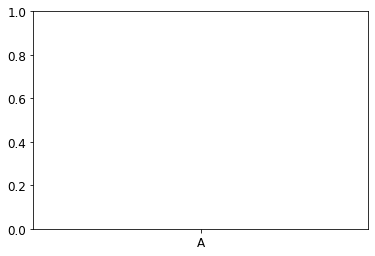

In [232]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
save_fig("generated_data_plot")
plt.show()

In [ ]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [ ]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [ ]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

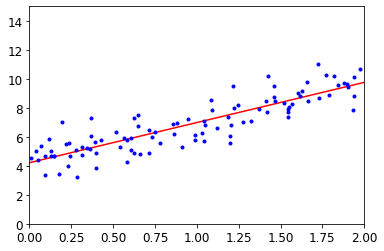

In [ ]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

adding labels and legend to the plot

Saving figure linear_model_predictions_plot


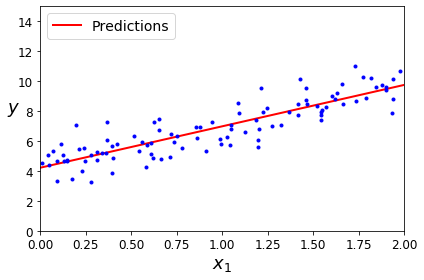

In [ ]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
save_fig("linear_model_predictions_plot")
plt.show()

# sklearn models

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [ ]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])


The LinearRegression class is based on the scipy.linalg.lstsq() function (the name stands for "least squares"), which you could call directly:

In [ ]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

 
This function computes $\mathbf{X}^+\mathbf{y}$, where $\mathbf{X}^{+}$ is the pseudoinverse of $\mathbf{X}$ (specifically the Moore-Penrose inverse). You can use np.linalg.pinv() to compute the pseudoinverse directly:

# Linear regression using batch gradient descent

# a
[10 Marks]
Write a simple implementation of a least-squares solution to linear regression that applies an iterative update to adjust the weights. Demonstrate the success of your approach on the sample data loaded below, and visualize the best fit plotted as a line (consider using linspace) against a scatter plot of the x and y test values

In [20]:
import numpy as np
import matplotlib.pyplot as plt
X = 2 * np.random.rand(100, 1)
Y = 4 + 3 * X + np.random.randn(100, 1)

In [11]:
X.shape

(100, 1)

In [3]:
Y.shape

(100, 1)

In [13]:
def GradientDescent(x, y, n,beta,learn_rate,epochs):
    #ittration as per epocs
    for W in range(epochs):
        #dot product to bais and variance
        predict = np.dot(x, beta)
        # loss calculation
        cost = predict - y
        #update beta with learing rate and gradient
        beta = beta - (learn_rate/n) * np.dot(x.T, cost)
    return beta


In [14]:
#changing the shape of Y and adding extra column to X
lst_y = []
for i in Y:
    lst_y.append(i[0])
y = np.array(lst_y)

x = np.concatenate((np.ones((X.shape[0], 1)),X), axis=1)

In [15]:
x.shape

(100, 2)

In [16]:
#initailizing the parameters
n = x.shape[1]
epochs= 2000
learning_rate = 0.01
beta = np.ones(n)
beta

array([1., 1.])

In [17]:
n

2

In [18]:
#traning 
beta = GradientDescent(x,y,n,beta,learning_rate,epochs)
beta

array([3.79896927, 3.07913165])

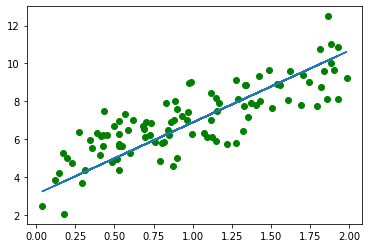

In [21]:
#Plot
line = beta[0]* X + beta[1]
plt.scatter(np.array(X),np.array(Y),c="g")
plt.plot(X,line)


# b
[10 Marks]
Load data on movie ratings, revenue, metadata etc. Split data into a relevant set for training, testing and classification. Explain your choice of split. It is ok if you decide to split into these subsets after part c -> if you do so, mention this at the end of your explanation.
Explanation:

In [170]:
### An example to load a csv file
import pandas as pd 
import numpy as np
from ast import literal_eval
meta_data=pd.read_csv('movies_metadata.csv', low_memory=False) # You may wish to specify types, or process columns once read
ratings_small=pd.read_csv('ratings_small.csv')
import warnings; warnings.simplefilter('ignore')

##### YOUR CODE HERE #######

In [171]:
meta_data.head(5)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [175]:
ratings_small

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
...,...,...,...,...
99999,671,6268,2.5,1065579370
100000,671,6269,4.0,1065149201
100001,671,6365,4.0,1070940363
100002,671,6385,2.5,1070979663


In [176]:
meta_data.columns


Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [177]:
ratings_small.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [178]:
ratings_small.dtypes

userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object

In [179]:
meta_data.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [180]:
#converting the data type in float
def convert_to_numeric(col):
    meta_data[col] = pd.to_numeric(meta_data[col],errors='coerce',downcast='integer')

In [181]:
for i in ["budget","id"]:
    convert_to_numeric(i)

In [182]:
ratings_small.rename(columns = {'movieId':'id'}, inplace = True)

In [183]:
meta_data = pd.merge(meta_data, ratings_small, on='id')

In [184]:
meta_data

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,spoken_languages,status,tagline,title,video,vote_average,vote_count,userId,rating,timestamp
0,False,NaN,60000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949.0,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0,23,3.5,1148721092
1,False,NaN,60000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949.0,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0,102,4.0,956598942
2,False,NaN,60000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949.0,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0,232,2.0,955092697
3,False,NaN,60000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949.0,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0,242,5.0,956688825
4,False,NaN,60000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949.0,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0,263,3.0,1117846575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44989,False,NaN,0.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 18, ...",NaN,64197.0,tt1047845,ru,Puteshestvie s domashnimi zhivotnymi,Plucked from an orphanage as a literal love sl...,...,"[{'iso_639_1': 'ru', 'name': 'Pусский'}]",Released,NaN,Travelling with Pets,False,6.0,5.0,73,4.0,1441513491
44990,False,NaN,0.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 18, ...",NaN,64197.0,tt1047845,ru,Puteshestvie s domashnimi zhivotnymi,Plucked from an orphanage as a literal love sl...,...,"[{'iso_639_1': 'ru', 'name': 'Pусский'}]",Released,NaN,Travelling with Pets,False,6.0,5.0,544,5.0,1435789819
44991,False,NaN,0.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 18, ...",NaN,64197.0,tt1047845,ru,Puteshestvie s domashnimi zhivotnymi,Plucked from an orphanage as a literal love sl...,...,"[{'iso_639_1': 'ru', 'name': 'Pусский'}]",Released,NaN,Travelling with Pets,False,6.0,5.0,648,3.5,1241951834
44992,False,NaN,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,98604.0,tt2147597,ru,Zolushka,"Masha Krapivina - is yet beautiful, and not th...",...,"[{'iso_639_1': 'ru', 'name': 'Pусский'}]",Released,NaN,Cinderella,False,4.6,6.0,352,4.0,1420521986


In [185]:
# meta_data.drop_duplicates(subset ="id",keep = False, inplace = True)

In [186]:
meta_data.shape

(44994, 27)

# c
[10 Marks]

Organize the data into relevant features for predicting revenue. 

i. Explain your feature sets and organization. 
YOUR EXPLANATION HERE



ii. Plot movie revenue vs. rating as a scatter plot and discuss your findings. 
YOUR EXPLANATION HERE



iii. Visualize any other relationships you deem interesting and explain. 
YOUR EXPLANATION HERE

In [187]:

# The following line is one way of cleaning up the genres field - there are more verbose ways of doing this that are easier for a human to read
meta_data['genres'] = meta_data['genres'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
meta_data['Year'] = pd.to_datetime(meta_data['release_date'], errors='coerce').apply(lambda x: str(x.year) if x != np.nan else np.nan)

meta_data.head()
# Consider how to columns look before and after this 'clean-up' - it is very common to have to massage the data to get the right features
# ratings_small.head() 
##### YOUR CODE HERE #######

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,status,tagline,title,video,vote_average,vote_count,userId,rating,timestamp,Year
0,False,NaN,60000000.0,"[Action, Crime, Drama, Thriller]",NaN,949.0,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0,23,3.5,1148721092,1995
1,False,NaN,60000000.0,"[Action, Crime, Drama, Thriller]",NaN,949.0,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0,102,4.0,956598942,1995
2,False,NaN,60000000.0,"[Action, Crime, Drama, Thriller]",NaN,949.0,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0,232,2.0,955092697,1995
3,False,NaN,60000000.0,"[Action, Crime, Drama, Thriller]",NaN,949.0,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0,242,5.0,956688825,1995
4,False,NaN,60000000.0,"[Action, Crime, Drama, Thriller]",NaN,949.0,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0,263,3.0,1117846575,1995


Used the same Code provided to clean genres and modified it for the following columns

In [188]:
meta_data['spoken_languages'] = meta_data['spoken_languages'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else[])
meta_data['production_companies'] = meta_data['production_companies'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else[])  
meta_data['production_countries'] = meta_data['production_countries'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else[])  

In [189]:
meta_data.isna().sum()

adult                        0
belongs_to_collection    34201
budget                       0
genres                       0
homepage                 34035
id                           0
imdb_id                      0
original_language            0
original_title               0
overview                   137
popularity                   0
poster_path                 36
production_companies         0
production_countries         0
release_date                29
revenue                      0
runtime                      4
spoken_languages             0
status                       1
tagline                  13478
title                        0
video                        0
vote_average                 0
vote_count                   0
userId                       0
rating                       0
timestamp                    0
Year                         0
dtype: int64

In [190]:
meta_data.shape

(44994, 28)

In [191]:
#checking values of poster path
meta_data["poster_path"]

0        /zMyfPUelumio3tiDKPffaUpsQTD.jpg
1        /zMyfPUelumio3tiDKPffaUpsQTD.jpg
2        /zMyfPUelumio3tiDKPffaUpsQTD.jpg
3        /zMyfPUelumio3tiDKPffaUpsQTD.jpg
4        /zMyfPUelumio3tiDKPffaUpsQTD.jpg
                       ...               
44989    /fZlvSGtAVfnXkJCY3Gnev05rUFk.jpg
44990    /fZlvSGtAVfnXkJCY3Gnev05rUFk.jpg
44991    /fZlvSGtAVfnXkJCY3Gnev05rUFk.jpg
44992    /cBFOyxe5HzIOIjJhipKQuslZsuV.jpg
44993     /ZLOgI7KjtWby1NEg2pjU2Id60W.jpg
Name: poster_path, Length: 44994, dtype: object

In [192]:
#droping column that not required.
meta_data=meta_data.drop(["belongs_to_collection","homepage","tagline","imdb_id","overview","poster_path","timestamp","userId"],axis=1)

In [193]:
##fillning non values with defaut english
# meta_data["original_language"].fillna('en', inplace=True)
meta_data["runtime"]=meta_data["runtime"].fillna(meta_data.runtime.mean())



In [194]:
#checking for the data types of the columns
meta_data.dtypes

adult                    object
budget                  float64
genres                   object
id                      float64
original_language        object
original_title           object
popularity               object
production_companies     object
production_countries     object
release_date             object
revenue                 float64
runtime                 float64
spoken_languages         object
status                   object
title                    object
video                    object
vote_average            float64
vote_count              float64
rating                  float64
Year                     object
dtype: object

In [195]:
#converting the data type in float
meta_data["Year"] = pd.to_numeric(meta_data["Year"],errors='coerce',downcast='integer')


In [196]:
meta_data.columns

Index(['adult', 'budget', 'genres', 'id', 'original_language',
       'original_title', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'title', 'video', 'vote_average',
       'vote_count', 'rating', 'Year'],
      dtype='object')

In [197]:
#cleaning the revenue andf buget section.
meta_data['revenue'].fillna(value=0)

meta_data.drop(meta_data[meta_data['budget']<=10000].index,inplace = True)
meta_data.drop(meta_data[meta_data['revenue']<=5000].index,inplace = True)


In [198]:
#checking status unique value
meta_data["status"].unique()


array(['Released'], dtype=object)

In [199]:
meta_data["status"] = meta_data["status"].fillna(value='Released')

In [200]:
# extracting date month and year and :
meta_data['release_date'] = pd.to_datetime(meta_data['release_date'], errors='coerce')
meta_data['Month'] = meta_data['release_date'].dt.month
meta_data['Day'] = meta_data['release_date'].dt.day

In [201]:
meta_data=meta_data.drop(["release_date"],axis=1)
meta_data.head(2)

,adult,budget,genres,id,original_language,original_title,popularity,production_companies,production_countries,revenue,...,spoken_languages,status,title,video,vote_average,vote_count,rating,Year,Month,Day
0,False,60000000.0,"[Action, Crime, Drama, Thriller]",949.0,en,Heat,17.924927,"[Regency Enterprises, Forward Pass, Warner Bros.]",[United States of America],187436818.0,...,"[English, Español]",Released,Heat,False,7.7,1886.0,3.5,1995.0,12,15
1,False,60000000.0,"[Action, Crime, Drama, Thriller]",949.0,en,Heat,17.924927,"[Regency Enterprises, Forward Pass, Warner Bros.]",[United States of America],187436818.0,...,"[English, Español]",Released,Heat,False,7.7,1886.0,4.0,1995.0,12,15


In [202]:
meta_data["Year"]=meta_data["Year"].fillna(meta_data.Year.mean())
meta_data['Month']=meta_data['Month'].fillna(meta_data.Month.mean())
meta_data['Day']=meta_data['Day'].fillna(meta_data.Day.mean())

In [203]:
meta_data.isna().sum()

adult                   0
budget                  0
genres                  0
id                      0
original_language       0
original_title          0
popularity              0
production_companies    0
production_countries    0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
title                   0
video                   0
vote_average            0
vote_count              0
rating                  0
Year                    0
Month                   0
Day                     0
dtype: int64

In [204]:
meta_data=meta_data.drop(["title"],axis=1)

In [205]:
meta_data.head(1)

,adult,budget,genres,id,original_language,original_title,popularity,production_companies,production_countries,revenue,runtime,spoken_languages,status,video,vote_average,vote_count,rating,Year,Month,Day
0,False,60000000.0,"[Action, Crime, Drama, Thriller]",949.0,en,Heat,17.924927,"[Regency Enterprises, Forward Pass, Warner Bros.]",[United States of America],187436818.0,170.0,"[English, Español]",Released,False,7.7,1886.0,3.5,1995.0,12,15


In [206]:
meta_data.shape

(21687, 20)

<AxesSubplot:xlabel='rating', ylabel='revenue'>

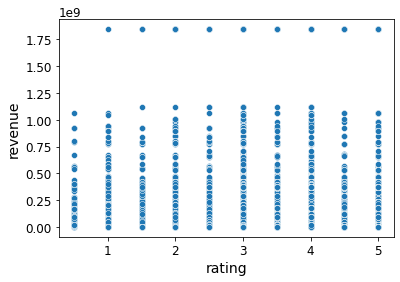

In [207]:
import seaborn as sns
sns.scatterplot(meta_data.rating,meta_data.revenue)

<AxesSubplot:xlabel='rating', ylabel='revenue'>

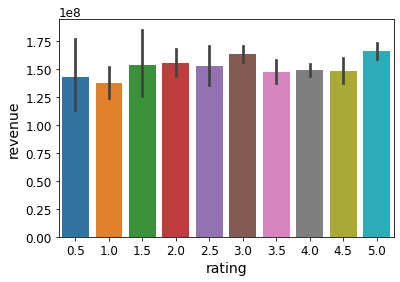

In [208]:
sns.barplot(meta_data.rating,meta_data.revenue)

In [209]:
meta_data.shape

(21687, 20)

In [210]:
data_vis = meta_data.drop_duplicates(subset ="id",keep = False)

In [211]:
toprev = data_vis.sort_values(by='revenue',ascending=False)
toprev.head(5)

,adult,budget,genres,id,original_language,original_title,popularity,production_companies,production_countries,revenue,runtime,spoken_languages,status,video,vote_average,vote_count,rating,Year,Month,Day
34935,False,300000000.0,"[Adventure, Fantasy, Action]",285.0,en,Pirates of the Caribbean: At World's End,31.363664,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],961000000.0,169.0,[English],Released,False,6.9,4627.0,4.0,2007.0,5,19
38284,False,250000000.0,"[Adventure, Fantasy, Family]",767.0,en,Harry Potter and the Half-Blood Prince,19.083723,"[Warner Bros., Heyday Films]","[United Kingdom, United States of America]",933959197.0,153.0,[English],Released,False,7.4,5435.0,4.0,2009.0,7,7
34800,False,258000000.0,"[Fantasy, Action, Adventure]",559.0,en,Spider-Man 3,27.614265,"[Columbia Pictures, Laura Ziskin Productions, ...",[United States of America],890871626.0,139.0,"[English, Français]",Released,False,5.9,3687.0,5.0,2007.0,5,1
39615,False,200000000.0,"[Animation, Family, Adventure, Comedy]",49013.0,en,Cars 2,13.693002,"[Walt Disney Pictures, Pixar Animation Studios]",[United States of America],559852396.0,106.0,"[English, 日本語, Italiano, Français]",Released,False,5.8,2088.0,1.0,2011.0,6,11
4266,False,18000000.0,"[Adventure, Action, Science Fiction]",1891.0,en,The Empire Strikes Back,19.470959,"[Lucasfilm, Twentieth Century Fox Film Corpora...",[United States of America],538400000.0,124.0,[English],Released,False,8.2,5998.0,2.0,1980.0,5,17


<function matplotlib.pyplot.show(close=None, block=None)>

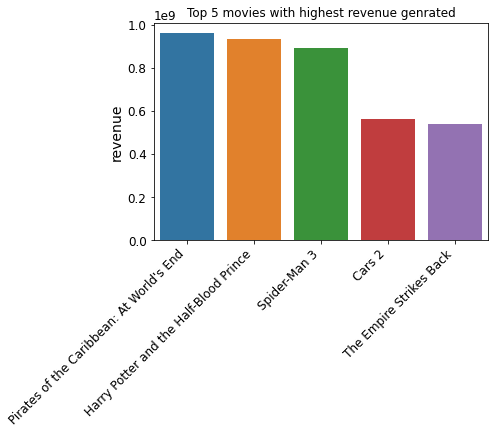

In [212]:
sns.barplot(
    x='original_title',
    y='revenue',
    data=toprev.head(5)
)
plt.title( "Top 5 movies with highest revenue genrated" , size = 12 )
plt.xticks(rotation = 45, ha = 'right')
plt.xlabel('')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

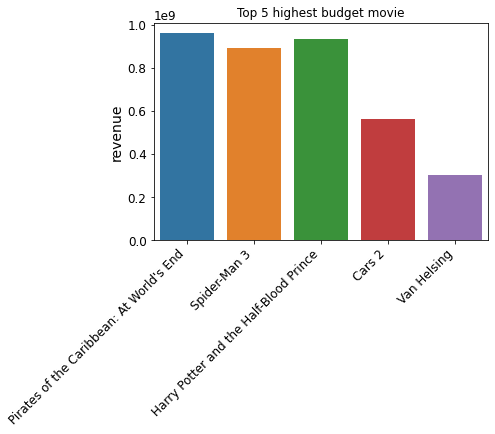

In [213]:
sns.barplot(
    x='original_title',
    y='revenue',
    data= data_vis.sort_values(by='budget',ascending=False).head(5)
)
plt.title( "Top 5 highest budget movie" , size = 12 )
plt.xticks(rotation = 45, ha = 'right')
plt.xlabel('')
plt.show

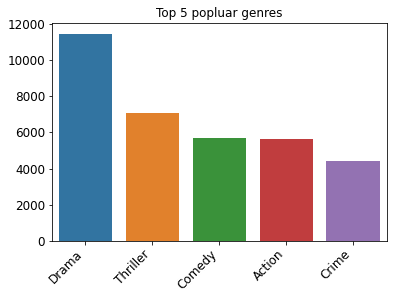

In [214]:
count_genres =  pd.value_counts(meta_data["genres"].explode()).head(5)
ax = sns.barplot(
        x=count_genres.index, 
        y=count_genres.values)
plt.xticks(rotation = 45, ha = 'right')
plt.title("Top 5 popluar genres")
plt.show()

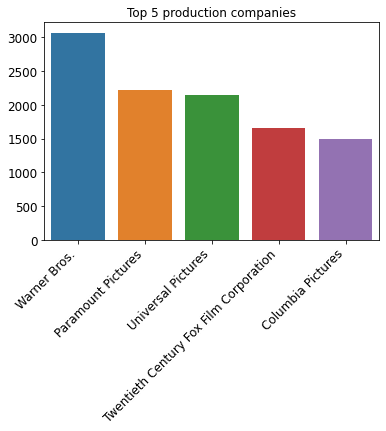

In [215]:
count_companies =  pd.value_counts(meta_data["production_companies"].explode()).head(5)
ax = sns.barplot(
        x=count_companies.index, 
        y=count_companies.values)
plt.xticks(rotation = 45, ha = 'right')
plt.title("Top 5 production companies")
plt.show()

In [216]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [217]:
meta_data['original_language'].unique()

array(['en', 'fr', 'it', 'de', 'ja', 'es', 'da', 'zh', 'hi', 'ko', 'ru',
       'fi', 'th', 'sv', 'ro'], dtype=object)

In [218]:
meta_data.columns

Index(['adult', 'budget', 'genres', 'id', 'original_language',
       'original_title', 'popularity', 'production_companies',
       'production_countries', 'revenue', 'runtime', 'spoken_languages',
       'status', 'video', 'vote_average', 'vote_count', 'rating', 'Year',
       'Month', 'Day'],
      dtype='object')

In [219]:
for i in ['adult','original_language','video','status']:
    meta_data[i] = encoder.fit_transform(meta_data[i])

In [220]:
meta_data=meta_data.drop(['genres','production_countries','production_companies','original_title','spoken_languages'],axis=1)

In [221]:
meta_data.head(5)

,adult,budget,id,original_language,popularity,revenue,runtime,status,video,vote_average,vote_count,rating,Year,Month,Day
0,0,60000000.0,949.0,2,17.924927,187436818.0,170.0,0,0,7.7,1886.0,3.5,1995.0,12,15
1,0,60000000.0,949.0,2,17.924927,187436818.0,170.0,0,0,7.7,1886.0,4.0,1995.0,12,15
2,0,60000000.0,949.0,2,17.924927,187436818.0,170.0,0,0,7.7,1886.0,2.0,1995.0,12,15
3,0,60000000.0,949.0,2,17.924927,187436818.0,170.0,0,0,7.7,1886.0,5.0,1995.0,12,15
4,0,60000000.0,949.0,2,17.924927,187436818.0,170.0,0,0,7.7,1886.0,3.0,1995.0,12,15


In [222]:
train_data = [col for col in meta_data.columns if col not in ['revenue']]
train_data = meta_data[train_data]

In [223]:
train_data.head(5)

,adult,budget,id,original_language,popularity,runtime,status,video,vote_average,vote_count,rating,Year,Month,Day
0,0,60000000.0,949.0,2,17.924927,170.0,0,0,7.7,1886.0,3.5,1995.0,12,15
1,0,60000000.0,949.0,2,17.924927,170.0,0,0,7.7,1886.0,4.0,1995.0,12,15
2,0,60000000.0,949.0,2,17.924927,170.0,0,0,7.7,1886.0,2.0,1995.0,12,15
3,0,60000000.0,949.0,2,17.924927,170.0,0,0,7.7,1886.0,5.0,1995.0,12,15
4,0,60000000.0,949.0,2,17.924927,170.0,0,0,7.7,1886.0,3.0,1995.0,12,15


In [224]:
pred_data = meta_data['revenue']
pred_data

0        187436818.0
1        187436818.0
2        187436818.0
3        187436818.0
4        187436818.0
            ...     
44244        32788.0
44245        32788.0
44246        32788.0
44905     22175908.0
44923      2411594.0
Name: revenue, Length: 21687, dtype: float64

In [225]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_data ,pred_data,random_state=1, test_size=0.25)

In [226]:
X_train

,adult,budget,id,original_language,popularity,runtime,status,video,vote_average,vote_count,rating,Year,Month,Day
31907,0,3000000.0,292.0,2,2.092791,100.0,0,0,6.5,29.0,3.0,2005.0,9,12
27352,0,200000000.0,558.0,2,10.834506,127.0,0,0,6.7,4432.0,1.0,2004.0,6,25
36555,0,40000000.0,440.0,2,10.793324,94.0,0,0,4.9,758.0,4.0,2007.0,12,25
8912,0,17000000.0,97.0,2,16.574021,96.0,0,0,6.6,717.0,3.5,1982.0,7,9
10872,0,75000000.0,1641.0,2,7.906035,105.0,0,0,5.1,141.0,5.0,1999.0,3,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16844,0,23000000.0,2453.0,2,7.338188,98.0,0,0,6.1,86.0,3.0,1991.0,8,23
31199,0,14200000.0,1951.0,0,4.568999,139.0,0,0,6.9,81.0,3.0,2005.0,5,16
7497,0,38000000.0,6283.0,2,6.456233,98.0,0,0,6.2,297.0,3.5,1997.0,12,19
19005,0,12000000.0,150.0,2,15.297121,96.0,0,0,6.5,364.0,2.5,1982.0,12,7


In [227]:
y_train

31907     11718595.0
27352    783766341.0
36555     41797066.0
8912      33000000.0
10872     93888180.0
            ...     
16844      7434726.0
31199       674918.0
7497     122417389.0
19005     78868508.0
346       14702438.0
Name: revenue, Length: 16265, dtype: float64